In [1]:
# MAC
import ssl
ssl._create_default_https_context = ssl._create_unverified_context

In [2]:
from keras.datasets.mnist import load_data
#((x_train, y_train), (x_test, y_test))
(x_train, y_train), (x_test, y_test) = load_data()

Using TensorFlow backend.


In [3]:
print(x_train.shape)
print(x_test.shape)

(60000, 28, 28)
(10000, 28, 28)


2


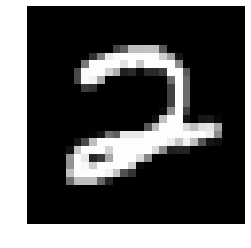

In [4]:
import matplotlib.pyplot as plt
%matplotlib inline
import random
c = random.randint(0, 59999)
print(y_train[c])
plt.axis("off")
plt.imshow(x_train[c], cmap="gray")

In [6]:
import pandas as pd
pd.DataFrame(x_train[c]).head()

,0,1,2,3,4,5,6,7,8,9,...,18,19,20,21,22,23,24,25,26,27
0,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
1,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
2,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0
4,0,0,0,0,0,0,0,0,0,0,...,0,0,0,0,0,0,0,0,0,0


In [7]:
# 資料處理
# 1. 圖片部分 
# 把你圖轉成 0 - 1
# MLP的輸入必須是一維, 必須把她拉平
x_train_shape = x_train.reshape(60000, 784) / 255
x_test_shape = x_test.reshape(10000, 784) / 255

In [8]:
# 2. 答案部分
# 變成十個機率: 3 -> [0, 0, 0, 1, 0, 0, 0, 0, 0, 0]
from keras.utils.np_utils import to_categorical
y_train_cat = to_categorical(y_train)
y_test_cat = to_categorical(y_test)
print("處理前:", y_train[0])
print("處理後:", y_train_cat[0])

處理前: 5
處理後: [0. 0. 0. 0. 0. 1. 0. 0. 0. 0.]


In [9]:
# 1. 建立模型
from keras.models import Sequential
from keras.layers import Dense
mlp = Sequential()
#Param: 784 * 256 + 256(bias)
mlp.add(Dense(256, input_dim=784, activation="relu"))
#Param: 256 * 10 + 10(bias)
mlp.add(Dense(10, activation="softmax"))
mlp.summary()

Instructions for updating:
Colocations handled automatically by placer.
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense_1 (Dense)              (None, 256)               200960    
_________________________________________________________________
dense_2 (Dense)              (None, 10)                2570      
Total params: 203,530
Trainable params: 203,530
Non-trainable params: 0
_________________________________________________________________


In [10]:
# 2. 確定你梯度下降所用的參數
# loss 一個神經元: binary_crossentropy 兩個以上神經元: categorical_crossentropy
# (補充) 回歸 神經元 acitvation不帶入, loss="mse"
mlp.compile(loss="categorical_crossentropy", optimizer="adam", metrics=["accuracy"])

In [11]:
# 3. 訓練!!!!
# batch_size: 看幾筆調整一次W
# epochs: 整個資料集總共看幾次
# batch = 200, epochs = 10: 60000 * 10 / 200 = 3000次梯度調整
# fit到什麼時候為止呢? val_loss開始平緩就停下來
mlp.fit(x_train_shape, y_train_cat, batch_size=200, epochs=15, validation_split=0.1, verbose=2)

Instructions for updating:
Use tf.cast instead.
Train on 54000 samples, validate on 6000 samples
Epoch 1/15
 - 5s - loss: 0.3665 - acc: 0.8984 - val_loss: 0.1599 - val_acc: 0.9590
Epoch 2/15
 - 2s - loss: 0.1613 - acc: 0.9537 - val_loss: 0.1171 - val_acc: 0.9680
Epoch 3/15
 - 2s - loss: 0.1134 - acc: 0.9673 - val_loss: 0.1023 - val_acc: 0.9715
Epoch 4/15
 - 2s - loss: 0.0863 - acc: 0.9751 - val_loss: 0.0874 - val_acc: 0.9735
Epoch 5/15
 - 2s - loss: 0.0677 - acc: 0.9800 - val_loss: 0.0806 - val_acc: 0.9775
Epoch 6/15
 - 2s - loss: 0.0548 - acc: 0.9845 - val_loss: 0.0709 - val_acc: 0.9802
Epoch 7/15
 - 2s - loss: 0.0447 - acc: 0.9870 - val_loss: 0.0734 - val_acc: 0.9787
Epoch 8/15
 - 2s - loss: 0.0362 - acc: 0.9906 - val_loss: 0.0721 - val_acc: 0.9782
Epoch 9/15
 - 2s - loss: 0.0301 - acc: 0.9926 - val_loss: 0.0674 - val_acc: 0.9820
Epoch 10/15
 - 2s - loss: 0.0253 - acc: 0.9938 - val_loss: 0.0816 - val_acc: 0.9783
Epoch 11/15
 - 2s - loss: 0.0206 - acc: 0.9954 - val_loss: 0.0694 - val_

In [12]:
mlp.predict_classes(x_test_shape)

array([7, 2, 1, ..., 4, 5, 6], dtype=int64)

In [13]:
# 不用再自己accuracy_score, 你可以使用evaluate
mlp.evaluate(x_test_shape, y_test_cat)

10000/10000 [==============================] - 1s 61us/step


[0.07007124051606807, 0.9783]

In [14]:
from sklearn.metrics import confusion_matrix
pre = mlp.predict_classes(x_test_shape)
pd.DataFrame(confusion_matrix(y_test, pre))

,0,1,2,3,4,5,6,7,8,9
0,970,1,1,1,1,0,3,1,2,0
1,0,1124,2,2,0,1,2,1,3,0
2,5,1,1004,4,2,0,2,7,6,1
3,0,0,3,994,0,2,0,5,1,5
4,2,0,1,0,965,0,4,2,2,6
5,2,0,0,13,1,861,10,1,2,2
6,3,2,2,2,2,1,946,0,0,0
7,1,4,9,1,1,0,0,1006,2,4
8,4,0,3,8,6,3,2,5,939,4
9,2,3,1,10,8,1,1,7,2,974


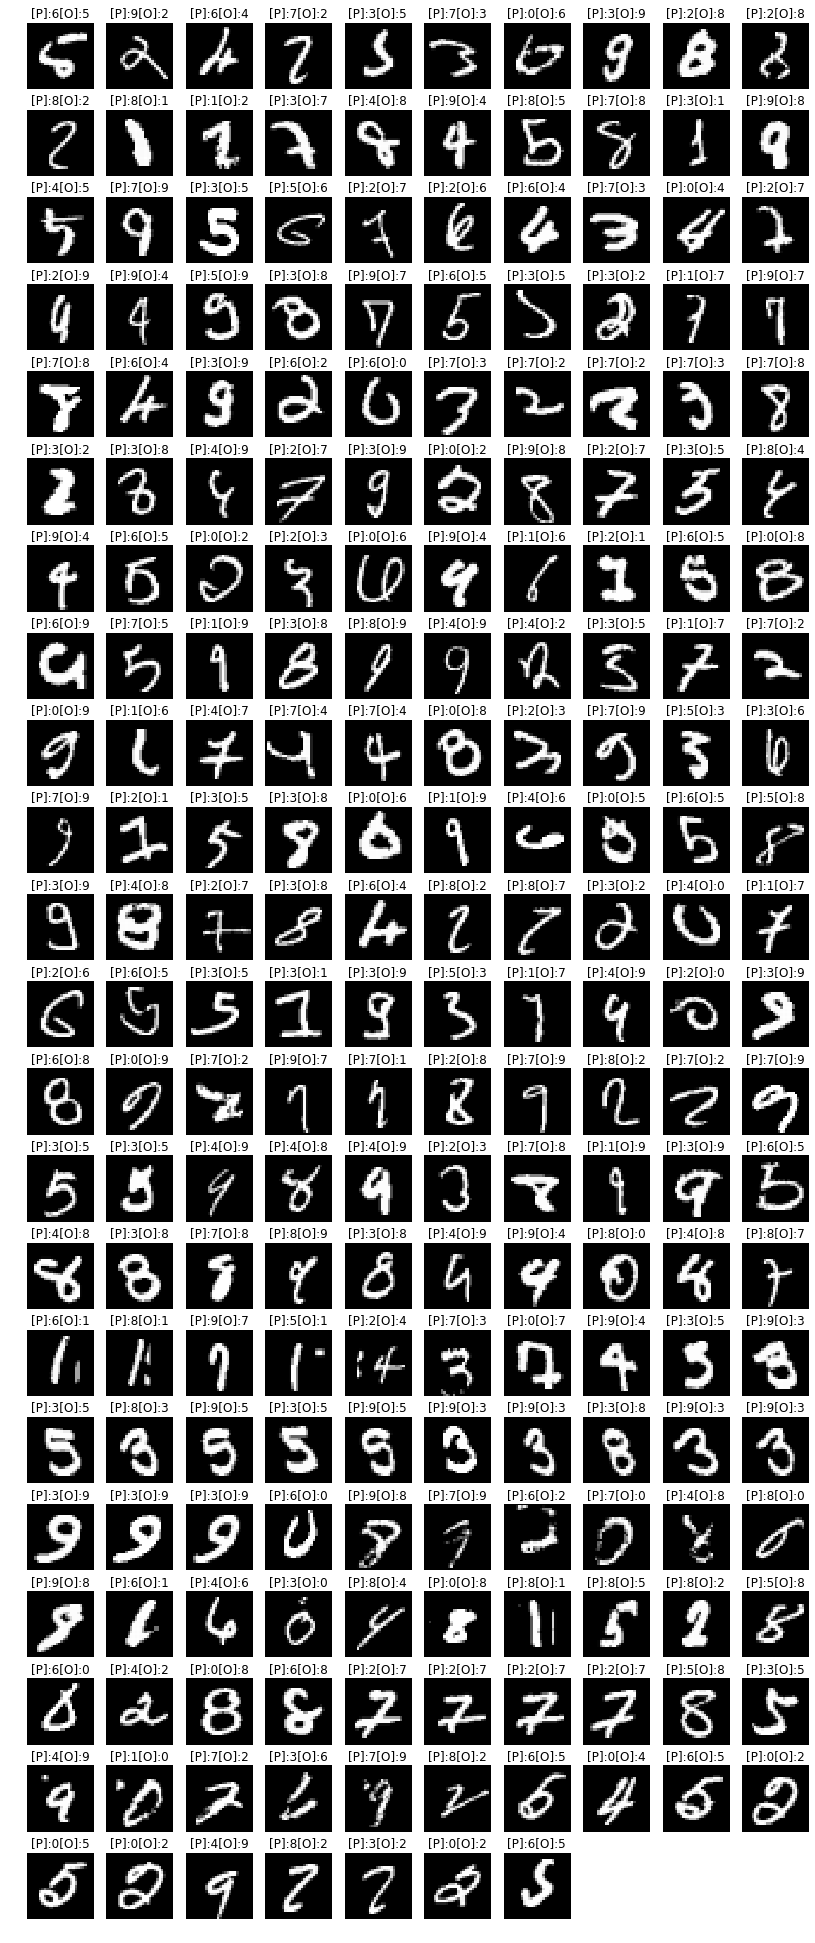

In [15]:
import numpy as np
idxs = np.nonzero(pre != y_test)[0]
# ["a", "b", "c"]
# for in : a -> b -> c
# for in enumerate : (0, a) -> (1, b) -> (2, c)
plt.figure(figsize=(14, 35))
width = 10
height = int(len(idxs) / width) + 1
falsepre = pre[idxs]
falseori = y_test[idxs]
for (i, img) in enumerate(x_test[idxs]):
    plt.subplot(height, width, i + 1)
    t = "[P]:" + str(falsepre[i]) + "[O]:" + str(falseori[i])
    plt.title(t)
    plt.axis("off")
    plt.imshow(img, cmap="gray")

In [16]:
print("預測錯誤標籤:", pre[idxs])
print("正確標籤:", y_test[idxs])

預測錯誤標籤: [6 9 6 7 3 7 0 3 2 2 8 8 1 3 4 9 8 7 3 9 4 7 3 5 2 2 6 7 0 2 2 9 5 3 9 6 3
 3 1 9 7 6 3 6 6 7 7 7 7 7 3 3 4 2 3 0 9 2 3 8 9 6 0 2 0 9 1 2 6 0 6 7 1 3
 8 4 4 3 1 7 0 1 4 7 7 0 2 7 5 3 7 2 3 3 0 1 4 0 6 5 3 4 2 3 6 8 8 3 4 1 2
 6 3 3 3 5 1 4 2 3 6 0 7 9 7 2 7 8 7 7 3 3 4 4 4 2 7 1 3 6 4 3 7 8 3 4 9 8
 4 8 6 8 9 5 2 7 0 9 3 9 3 8 9 3 9 9 9 3 9 9 3 3 3 6 9 7 6 7 4 8 9 6 4 3 8
 0 8 8 8 5 6 4 0 6 2 2 2 2 5 3 4 1 7 3 7 8 6 0 6 0 0 0 4 8 3 0 6]
正確標籤: [5 2 4 2 5 3 6 9 8 8 2 1 2 7 8 4 5 8 1 8 5 9 5 6 7 6 4 3 4 7 9 4 9 8 7 5 5
 2 7 7 8 4 9 2 0 3 2 2 3 8 2 8 9 7 9 2 8 7 5 4 4 5 2 3 6 4 6 1 5 8 9 5 9 8
 9 9 2 5 7 2 9 6 7 4 4 8 3 9 3 6 9 1 5 8 6 9 6 5 5 8 9 8 7 8 4 2 7 2 0 7 6
 5 5 1 9 3 7 9 0 9 8 9 2 7 1 8 9 2 2 9 5 5 9 8 9 3 8 9 9 5 8 8 8 9 8 9 4 0
 8 7 1 1 7 1 4 3 7 4 5 3 5 3 5 5 5 3 3 8 3 3 9 9 9 0 8 9 2 0 8 0 8 1 6 0 4
 8 1 5 2 8 0 2 8 8 7 7 7 7 8 5 9 0 2 6 9 2 5 4 5 2 5 2 9 2 2 2 5]


In [19]:
# 兩大圖像處理函式庫(PIL, opencv)
# PIL幫我安裝Pillow
# !!! 再用的時候所有東西都轉成np array
from PIL import Image
fn = input("請輸入檔名:")
oriimg = Image.open(fn).convert("L")
img = oriimg.resize((28, 28))
img_shape = np.array(img).reshape(784) / 255
print("預測結果:", mlp.predict_classes(np.array([img_shape])))
oriimg

請輸入檔名:9.png
預測結果: [9]
